In [204]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, Normalizer

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error
from pmdarima import auto_arima
import random
import itertools
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import ExtraTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.decomposition import PCA, KernelPCA
from tqdm import tqdm
import itertools

seed = 77
regressors = [CatBoostRegressor(random_state=seed,n_estimators=5000),
             LGBMRegressor(random_state=seed),
             XGBRegressor(random_state=seed),
             ExtraTreeRegressor(random_state=seed),
             DecisionTreeRegressor(random_state=seed),
             RandomForestRegressor(random_state=seed)]

In [205]:
# sudo_date_pattern < 06-16 drop
# sudo_day_of_week
# sudo_night
# sudo_line_loc 
# rf	Random Forest Regressor	209.8683	196059.9855	439.1817	0.9689	0.1920	0.1138	9.4040
# xgboost	Extreme Gradient Boosting	261.2866	198893.7859	445.2230	0.9684	0.2313	0.1536	2.9780
# catboost	CatBoost Regressor	269.8176	202353.6340	449.0140	0.9679	0.2313	0.1593	4.6380
# et	Extra Trees Regressor	222.5143	206014.0346	450.6908	0.9673	0.1998	0.1226	6.3890
# lightgbm	Light Gradient Boosting Machine	334.9355	270773.8221	520.1849	0.9570	0.2624	0.2034	2.1770
# dt

In [206]:
building

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000
...,...,...,...,...,...,...,...
95,96,호텔및리조트,93314.00,60500.00,-,-,-
96,97,호텔및리조트,55144.67,25880.00,-,-,-
97,98,호텔및리조트,53578.62,17373.75,-,-,-
98,99,호텔및리조트,53499.00,40636.00,-,-,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204000 entries, 0 to 203999
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   num_date_time  204000 non-null  object 
 1   건물번호           204000 non-null  int64  
 2   일시             204000 non-null  object 
 3   기온(C)          204000 non-null  float64
 4   강수량(mm)        43931 non-null   float64
 5   풍속(m/s)        204000 non-null  float64
 6   습도(%)          204000 non-null  float64
 7   일조(hr)         128818 non-null  float64
 8   일사(MJ/m2)      116087 non-null  float64
 9   전력소비량(kWh)     204000 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.6+ MB


<AxesSubplot: >

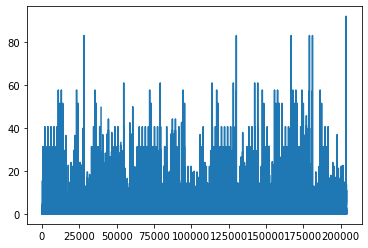

In [207]:
train = pd.read_csv('./train.csv')

tar = ['풍속(m/s)','습도(%)']
for i in tar:
    imp = IterativeImputer(random_state=seed)
    imp.fit(train[[i]])
    train[i] = imp.transform(train[[i]])

train.info()
train['강수량(mm)'].plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num_date_time  16800 non-null  object 
 1   건물번호           16800 non-null  int64  
 2   일시             16800 non-null  object 
 3   기온(C)          16800 non-null  float64
 4   강수량(mm)        16800 non-null  float64
 5   풍속(m/s)        16800 non-null  float64
 6   습도(%)          16800 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 918.9+ KB


<AxesSubplot: >

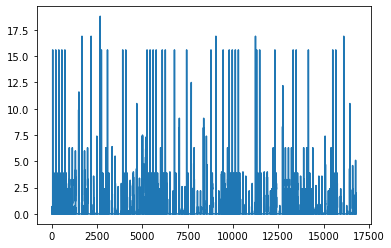

In [208]:
test = pd.read_csv('./test.csv')
test.info()
test['강수량(mm)'].plot()

In [209]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
building = pd.read_csv('./building_info.csv')

# train["date"] = train["num_date_time"].apply(lambda x: x.split("_")[1])
# train["date"] = pd.to_datetime(train["date"])
# test["date"] = test["num_date_time"].apply(lambda x: x.split("_")[1])
# test["date"] = pd.to_datetime(test["date"])

tar = ['풍속(m/s)','습도(%)']
for i in tar:
    imp = IterativeImputer(random_state=seed)
    imp.fit(train[[i]])
    train[i] = imp.transform(train[[i]])


train['month'] = train['일시'].apply(lambda x : float(x[4:6]))
train['day'] = train['일시'].apply(lambda x : float(x[6:8]))
train['time'] = train['일시'].apply(lambda x : float(x[9:11]))

test['month'] = test['일시'].apply(lambda x : float(x[4:6]))
test['day'] = test['일시'].apply(lambda x : float(x[6:8]))
test['time'] = test['일시'].apply(lambda x : float(x[9:11]))
train = train.drop(['num_date_time'],axis=1)
test = test.drop(['num_date_time'],axis=1)

train['일시'] = pd.to_datetime(train['일시'])
test['일시'] = pd.to_datetime(test['일시'])
# train = train[train['일시'] > '2022-06-17T23:00:00.000000000']

train = train.rename(columns={
    '일시': 'date'})

test = test.rename(columns={
    '일시': 'date'})

weekend = [0 for _ in range(len(train))]
for i in train.query('date.dt.dayofweek == 6').index:
    weekend[i] = 1
for i in train.query('date.dt.dayofweek == 5').index:
    weekend[i] = 1
train['sudo_weekend'] = weekend

weekend = [0 for _ in range(len(test))]
for i in test.query('date.dt.dayofweek == 6').index:
    weekend[i] = 1
for i in test.query('date.dt.dayofweek == 5').index:
    weekend[i] = 1
test['sudo_weekend'] = weekend


holiday = [f'2022-06-06 0{i}:00:00' for i in range(10)]
holiday.extend([f'2022-06-06 {i}:00:00' for i in range(10,24)])
holiday.extend([f'2022-08-15 0{i}:00:00' for i in range(10)])
holiday.extend([f'2022-08-15 {i}:00:00' for i in range(10,24)])
holy_idx = [train[train['date']==i].index for i in holiday]
ans = [0 for _ in range(len(train))]
for t in holy_idx:
    for idx in t:
        ans[idx] = 1
train['sudo_holiday'] = ans

holy_idx = [test[test['date']==i].index for i in holiday]
ans = [0 for _ in range(len(test))]
for t in holy_idx:
    for idx in t:
        ans[idx] = 1
test['sudo_holiday'] = ans

train['강수량(mm)'] = train['강수량(mm)'].fillna(0)
train['일조(hr)'] = train['일조(hr)'].fillna(0)
train['일사(MJ/m2)'] = train['일사(MJ/m2)'].fillna(0)

train = train.drop(['일조(hr)','일사(MJ/m2)'],axis=1)

# train['풍속(m/s)'] = np.log10(train['풍속(m/s)']+2)
# test['풍속(m/s)'] = np.log10(test['풍속(m/s)']+2)

train = pd.merge(train,building)
test = pd.merge(test,building)
train = train.drop(['태양광용량(kW)','ESS저장용량(kWh)','PCS용량(kW)'],axis=1)
test = test.drop(['태양광용량(kW)','ESS저장용량(kWh)','PCS용량(kW)'],axis=1)


# MM = MinMaxScaler()
# train['습도(%)'] = MM.fit_transform(np.array(train['습도(%)']).reshape(-1,1))
# test['습도(%)'] = MM.fit_transform(np.array(test['습도(%)']).reshape(-1,1))

# enc = OneHotEncoder()
# enc.fit(train[['건물유형']])
# tp = pd.DataFrame(data=enc.transform(train[['건물유형']]).toarray(),columns=enc.categories_[0])
# train = pd.concat([train,tp],axis=1)

# enc = OneHotEncoder()
# enc.fit(test[['건물유형']])
# tp = pd.DataFrame(data=enc.transform(test[['건물유형']]).toarray(),columns=enc.categories_[0])
# test = pd.concat([test,tp],axis=1)

# MM = MinMaxScaler()
# train['연면적(m2)'] = MM.fit_transform(np.array(train['냉방면적(m2)']).reshape(-1,1))
# test['연면적(m2)'] = MM.fit_transform(np.array(test['냉방면적(m2)']).reshape(-1,1))
# train['냉방면적(m2)'] = MM.fit_transform(np.array(train['냉방면적(m2)']).reshape(-1,1))
# test['냉방면적(m2)'] = MM.fit_transform(np.array(test['냉방면적(m2)']).reshape(-1,1))

train['냉방면적비'] = train['냉방면적(m2)']/train['연면적(m2)']
test['냉방면적비'] = test['냉방면적(m2)']/test['연면적(m2)']

train = train.drop(['냉방면적(m2)','연면적(m2)'],axis=1)
test = test.drop(['냉방면적(m2)','연면적(m2)'],axis=1)
train['습도(%)'] = train['습도(%)']/100
test['습도(%)'] = test['습도(%)']/100
# target = ['기온(C)','풍속(m/s)']
# enc = Normalizer()
# for tar in target:
#     train[tar] = MM.fit_transform(np.array(train[tar]).reshape(-1,1))
#     test[tar] = MM.fit_transform(np.array(test[tar]).reshape(-1,1))
    

# enc = OneHotEncoder()
# target = '건물번호'
# enc.fit(train[[target]])
# tp = pd.DataFrame(data=enc.transform(train[[target]]).toarray(),columns=[str(i) for i in enc.categories_[0]])
# train = pd.concat([train,tp],axis=1)

# enc = OneHotEncoder()
# enc.fit(test[[target]])
# tp = pd.DataFrame(data=enc.transform(test[[target]]).toarray(),columns=[str(i) for i in enc.categories_[0]])
# test = pd.concat([test,tp],axis=1)

# train = train.drop(['건물유형'],axis=1)
# test = test.drop(['건물유형'],axis=1)

In [210]:
train.corr()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),전력소비량(kWh),month,day,time,sudo_weekend,sudo_holiday,냉방면적비
건물번호,1.000000e+00,-0.004505,-0.004135,0.021481,0.022984,-0.180474,-2.790756e-14,3.608018e-15,-3.480358e-15,-1.169473e-15,-7.737096e-16,-5.804020e-02
기온(C),-4.504794e-03,1.000000,-0.068643,0.220179,-0.389834,0.171190,4.271998e-01,6.949836e-02,2.914288e-01,9.065367e-02,-6.537304e-02,1.484538e-02
강수량(mm),-4.134622e-03,-0.068643,1.000000,0.048093,0.199571,0.015083,4.343621e-02,2.710738e-02,1.372893e-02,-5.948565e-02,-1.850153e-02,-9.868147e-04
풍속(m/s),2.148121e-02,0.220179,0.048093,1.000000,-0.219093,0.109952,-8.634666e-02,1.002161e-01,1.770954e-01,-9.136570e-02,1.270219e-01,3.339690e-02
습도(%),2.298378e-02,-0.389834,0.199571,-0.219093,1.000000,-0.129546,2.539205e-01,1.184162e-01,-2.805900e-01,-3.368095e-02,-2.781759e-03,-3.535342e-02
전력소비량(kWh),-1.804737e-01,0.171190,0.015083,0.109952,-0.129546,1.000000,5.584234e-02,9.233027e-03,9.959427e-02,-5.788767e-02,-2.084124e-02,1.726508e-01
month,-2.790756e-14,0.427200,0.043436,-0.086347,0.253921,0.055842,1.000000e+00,-1.333186e-01,-8.672975e-17,-1.006946e-02,1.380164e-02,3.917007e-15
day,3.608018e-15,0.069498,0.027107,0.100216,0.118416,0.009233,-1.333186e-01,1.000000e+00,2.210557e-17,3.079794e-02,-7.967743e-02,-7.089745e-16
time,-3.480358e-15,0.291429,0.013729,0.177095,-0.280590,0.099594,-8.672975e-17,2.210557e-17,1.000000e+00,-2.417248e-19,-7.014404e-18,5.850725e-16
sudo_weekend,-1.169473e-15,0.090654,-0.059486,-0.091366,-0.033681,-0.057888,-1.006946e-02,3.079794e-02,-2.417248e-19,1.000000e+00,-9.736809e-02,-5.171890e-16


In [193]:
regression_type = train['건물유형'].unique()
data = [train[train['건물유형'] == i].reset_index(drop=True).drop(['건물번호','건물유형'],axis=1) for i in train['건물유형'].unique()]
data

[                     date  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  전력소비량(kWh)  month  \
 0     2022-06-01 00:00:00   18.6      0.0      0.9   0.42     1085.28    6.0   
 1     2022-06-01 01:00:00   18.0      0.0      1.1   0.45     1047.36    6.0   
 2     2022-06-01 02:00:00   17.7      0.0      1.5   0.45      974.88    6.0   
 3     2022-06-01 03:00:00   16.7      0.0      1.4   0.48      953.76    6.0   
 4     2022-06-01 04:00:00   18.4      0.0      2.8   0.43      986.40    6.0   
 ...                   ...    ...      ...      ...    ...         ...    ...   
 30595 2022-08-24 19:00:00   21.7      0.0      1.6   0.91     1819.44    8.0   
 30596 2022-08-24 20:00:00   21.8      0.0      1.7   0.92     1918.17    8.0   
 30597 2022-08-24 21:00:00   21.4      0.0      1.1   0.92     1999.53    8.0   
 30598 2022-08-24 22:00:00   21.4      0.0      0.3   0.92     2043.63    8.0   
 30599 2022-08-24 23:00:00   21.5      0.0      0.7   0.91     1963.80    8.0   
 
         day  time  sudo_w

In [211]:
regression_type = train['건물번호'].unique()
data = [train[train['건물번호'] == i].reset_index(drop=True).drop(['건물번호','건물유형'],axis=1) for i in train['건물번호'].unique()]
data

[                    date  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  전력소비량(kWh)  month  \
 0    2022-06-01 00:00:00   18.6      0.0      0.9   0.42     1085.28    6.0   
 1    2022-06-01 01:00:00   18.0      0.0      1.1   0.45     1047.36    6.0   
 2    2022-06-01 02:00:00   17.7      0.0      1.5   0.45      974.88    6.0   
 3    2022-06-01 03:00:00   16.7      0.0      1.4   0.48      953.76    6.0   
 4    2022-06-01 04:00:00   18.4      0.0      2.8   0.43      986.40    6.0   
 ...                  ...    ...      ...      ...    ...         ...    ...   
 2035 2022-08-24 19:00:00   25.5      0.0      2.9   0.63     2517.12    8.0   
 2036 2022-08-24 20:00:00   25.0      0.0      2.6   0.66     2208.96    8.0   
 2037 2022-08-24 21:00:00   24.6      0.0      1.3   0.67     1806.24    8.0   
 2038 2022-08-24 22:00:00   24.1      0.0      2.1   0.70     1387.20    8.0   
 2039 2022-08-24 23:00:00   23.8      0.0      1.4   0.70     1925.28    8.0   
 
        day  time  sudo_weekend  sudo_

In [212]:
# train.fillna(method=)
# imputer 
def smape(A,F):
    A = np.array(A)
    F = np.array(F)
    return (100/len(A))*sum([abs(A[i]-F[i])/((abs(A[i])+abs(F[i]))) for i in range(len(A))])


regressors = []

for k in tqdm(range(len(data))):
    train = data[k]

    train_x = train[train['date'] < '2022-08-20 00:00:00']
    train_y = train_x['전력소비량(kWh)']
    train_x = train_x.drop('전력소비량(kWh)',axis=1)
    valid_x = train[train['date'] >= '2022-08-20 00:00:00']
    valid_y = valid_x['전력소비량(kWh)']
    valid_x = valid_x.drop('전력소비량(kWh)',axis=1)

    train_x = train_x.drop('date',axis=1)
    valid_x = valid_x.drop('date',axis=1)
    
    train_x = train.drop('date',axis=1)
    train_y = train['전력소비량(kWh)']
    train_x = train_x.drop('전력소비량(kWh)',axis=1)


    rf = RandomForestRegressor(random_state=seed,bootstrap=1000)
    rf.fit(train_x, train_y)
    
    regressors.append(rf)
    
    print(smape(valid_y,rf.predict(valid_x)))

  1%|▊                                                                                 | 1/100 [00:01<02:05,  1.27s/it]

1.3476482045463043


  2%|█▋                                                                                | 2/100 [00:02<02:13,  1.37s/it]

1.5619707036986321


  3%|██▍                                                                               | 3/100 [00:04<02:11,  1.36s/it]

1.8756749895617129


  4%|███▎                                                                              | 4/100 [00:05<02:14,  1.40s/it]

0.7210886632238347


  5%|████                                                                              | 5/100 [00:06<02:10,  1.38s/it]

3.4291576247413933


  6%|████▉                                                                             | 6/100 [00:08<02:06,  1.35s/it]

0.6108615506678775


  7%|█████▋                                                                            | 7/100 [00:09<02:04,  1.34s/it]

1.0987613676584835


  8%|██████▌                                                                           | 8/100 [00:10<02:00,  1.31s/it]

0.9108688820214255


  9%|███████▍                                                                          | 9/100 [00:11<01:55,  1.27s/it]

0.511012799593549


 10%|████████                                                                         | 10/100 [00:13<01:53,  1.26s/it]

0.650157863711484


 11%|████████▉                                                                        | 11/100 [00:14<01:55,  1.30s/it]

0.5880093196620327


 12%|█████████▋                                                                       | 12/100 [00:15<01:53,  1.29s/it]

0.8746965645918925


 13%|██████████▌                                                                      | 13/100 [00:17<01:52,  1.29s/it]

0.7779157048158979


 14%|███████████▎                                                                     | 14/100 [00:18<01:52,  1.31s/it]

2.0598263046351017


 15%|████████████▏                                                                    | 15/100 [00:19<01:54,  1.35s/it]

0.7406597857524154


 16%|████████████▉                                                                    | 16/100 [00:21<01:52,  1.34s/it]

0.7599818912848717


 17%|█████████████▊                                                                   | 17/100 [00:22<01:47,  1.30s/it]

1.0214672878540423


 18%|██████████████▌                                                                  | 18/100 [00:23<01:49,  1.34s/it]

1.0765892926116223


 19%|███████████████▍                                                                 | 19/100 [00:25<01:48,  1.34s/it]

1.1495326955227194


 20%|████████████████▏                                                                | 20/100 [00:26<01:47,  1.34s/it]

0.6558976199491067


 21%|█████████████████                                                                | 21/100 [00:27<01:40,  1.28s/it]

1.019252079626307


 22%|█████████████████▊                                                               | 22/100 [00:29<01:41,  1.31s/it]

0.5996114942850409


 23%|██████████████████▋                                                              | 23/100 [00:30<01:41,  1.31s/it]

0.22602896732591776


 24%|███████████████████▍                                                             | 24/100 [00:31<01:41,  1.34s/it]

0.5663506180360699


 25%|████████████████████▎                                                            | 25/100 [00:33<01:39,  1.33s/it]

0.6470070971418875


 26%|█████████████████████                                                            | 26/100 [00:34<01:36,  1.30s/it]

0.39954115110216876


 27%|█████████████████████▊                                                           | 27/100 [00:35<01:35,  1.31s/it]

0.2803670069487361


 28%|██████████████████████▋                                                          | 28/100 [00:36<01:35,  1.33s/it]

0.794433941328464


 29%|███████████████████████▍                                                         | 29/100 [00:38<01:30,  1.28s/it]

0.5401802525510124


 30%|████████████████████████▎                                                        | 30/100 [00:39<01:26,  1.24s/it]

1.0076353693831994


 31%|█████████████████████████                                                        | 31/100 [00:40<01:23,  1.21s/it]

0.6192931425450238


 32%|█████████████████████████▉                                                       | 32/100 [00:41<01:21,  1.19s/it]

0.058938008379530706


 33%|██████████████████████████▋                                                      | 33/100 [00:42<01:18,  1.17s/it]

0.05338644889595647


 34%|███████████████████████████▌                                                     | 34/100 [00:44<01:21,  1.23s/it]

0.09252409288711642


 35%|████████████████████████████▎                                                    | 35/100 [00:45<01:19,  1.23s/it]

0.05422704466940562


 36%|█████████████████████████████▏                                                   | 36/100 [00:46<01:17,  1.21s/it]

0.06382906755401338


 37%|█████████████████████████████▉                                                   | 37/100 [00:47<01:18,  1.24s/it]

0.5810581892525609


 38%|██████████████████████████████▊                                                  | 38/100 [00:49<01:17,  1.25s/it]

0.4734035292682624


 39%|███████████████████████████████▌                                                 | 39/100 [00:50<01:17,  1.28s/it]

0.5820864465992188


 40%|████████████████████████████████▍                                                | 40/100 [00:51<01:14,  1.24s/it]

0.9501361172169486


 41%|█████████████████████████████████▏                                               | 41/100 [00:52<01:14,  1.26s/it]

0.7685371299158898


 42%|██████████████████████████████████                                               | 42/100 [00:53<01:10,  1.22s/it]

3.0650679242751555


 43%|██████████████████████████████████▊                                              | 43/100 [00:55<01:08,  1.21s/it]

0.7820857413447329


 44%|███████████████████████████████████▋                                             | 44/100 [00:56<01:10,  1.25s/it]

0.5124435006167432


 45%|████████████████████████████████████▍                                            | 45/100 [00:57<01:09,  1.27s/it]

0.43484392028019636


 46%|█████████████████████████████████████▎                                           | 46/100 [00:59<01:08,  1.28s/it]

0.6069162356705567


 47%|██████████████████████████████████████                                           | 47/100 [01:00<01:06,  1.26s/it]

0.6059265402160704


 48%|██████████████████████████████████████▉                                          | 48/100 [01:01<01:04,  1.25s/it]

0.3414445716990193


 49%|███████████████████████████████████████▋                                         | 49/100 [01:02<01:04,  1.27s/it]

0.3313669582864357


 50%|████████████████████████████████████████▌                                        | 50/100 [01:04<01:03,  1.27s/it]

0.34707739282730915


 51%|█████████████████████████████████████████▎                                       | 51/100 [01:05<01:03,  1.29s/it]

0.46958302893422105


 52%|██████████████████████████████████████████                                       | 52/100 [01:06<01:02,  1.31s/it]

0.5290169970928323


 53%|██████████████████████████████████████████▉                                      | 53/100 [01:08<01:02,  1.33s/it]

1.3070863566652955


 54%|███████████████████████████████████████████▋                                     | 54/100 [01:09<01:00,  1.32s/it]

2.861431929282823


 55%|████████████████████████████████████████████▌                                    | 55/100 [01:10<00:58,  1.30s/it]

0.24140054406894343


 56%|█████████████████████████████████████████████▎                                   | 56/100 [01:12<00:58,  1.32s/it]

0.102884888584703


 57%|██████████████████████████████████████████████▏                                  | 57/100 [01:13<00:58,  1.36s/it]

0.6694203660581415


 58%|██████████████████████████████████████████████▉                                  | 58/100 [01:14<00:57,  1.36s/it]

0.06988728603985937


 59%|███████████████████████████████████████████████▊                                 | 59/100 [01:16<00:55,  1.36s/it]

1.291488364800229


 60%|████████████████████████████████████████████████▌                                | 60/100 [01:17<00:53,  1.34s/it]

0.825583593248178


 61%|█████████████████████████████████████████████████▍                               | 61/100 [01:18<00:51,  1.33s/it]

0.8092105822697059


 62%|██████████████████████████████████████████████████▏                              | 62/100 [01:20<00:50,  1.33s/it]

0.8105555045193557


 63%|███████████████████████████████████████████████████                              | 63/100 [01:21<00:48,  1.32s/it]

0.8433374369411416


 64%|███████████████████████████████████████████████████▊                             | 64/100 [01:22<00:48,  1.35s/it]

0.6901792578694594


 65%|████████████████████████████████████████████████████▋                            | 65/100 [01:24<00:46,  1.32s/it]

1.328374840799915


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [01:25<00:44,  1.31s/it]

0.6921118273230712


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [01:26<00:43,  1.32s/it]

0.9148196117444259


 68%|███████████████████████████████████████████████████████                          | 68/100 [01:28<00:41,  1.31s/it]

0.6496812110056132


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [01:29<00:41,  1.35s/it]

0.29369832774361143


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [01:30<00:40,  1.36s/it]

0.31038882609474727


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [01:32<00:39,  1.35s/it]

0.7987505730315997


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [01:33<00:37,  1.33s/it]

0.29968802384253207


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [01:35<00:36,  1.36s/it]

0.350725654649035


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [01:36<00:36,  1.40s/it]

1.0181178100784236


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [01:37<00:34,  1.37s/it]

0.779171557486476


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [01:39<00:34,  1.42s/it]

0.5145064098163004


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [01:40<00:33,  1.44s/it]

0.40997726301337156


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [01:42<00:31,  1.44s/it]

0.5004813706102009


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [01:43<00:29,  1.41s/it]

0.7179789037539855


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [01:44<00:27,  1.40s/it]

0.9086490925433331


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [01:46<00:26,  1.38s/it]

0.6911927004057735


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [01:47<00:25,  1.41s/it]

0.8484595831187136


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [01:49<00:24,  1.46s/it]

0.7492246446489466


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [01:50<00:23,  1.44s/it]

0.5703309057256496


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [01:52<00:21,  1.41s/it]

0.5168787982509321


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [01:53<00:20,  1.43s/it]

0.6314764900362173


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [01:55<00:18,  1.45s/it]

1.2376440625156258


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [01:56<00:17,  1.48s/it]

0.5280197463481866


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [01:58<00:16,  1.51s/it]

0.6032096747914815


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [01:59<00:15,  1.51s/it]

0.8509421282842874


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [02:01<00:13,  1.49s/it]

1.7366001106856426


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [02:02<00:11,  1.47s/it]

0.6412375445843361


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [02:04<00:10,  1.47s/it]

0.6668130039730555


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [02:05<00:08,  1.41s/it]

0.9558920484470187


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [02:06<00:07,  1.45s/it]

2.7576678997998045


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [02:08<00:05,  1.41s/it]

0.4774255121931525


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [02:09<00:04,  1.41s/it]

0.8185126742317473


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [02:10<00:02,  1.37s/it]

1.6358071936142502


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [02:12<00:01,  1.31s/it]

0.6623235160969108


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:13<00:00,  1.34s/it]

0.8793686966165767


In [213]:
regressors = []

for k in tqdm(range(len(data))):
    train = data[k]

#     train_x = train[train['date'] < '2022-08-20 00:00:00']
#     train_y = train_x['전력소비량(kWh)']
#     train_x = train_x.drop('전력소비량(kWh)',axis=1)
#     valid_x = train[train['date'] >= '2022-08-20 00:00:00']
#     valid_y = valid_x['전력소비량(kWh)']
#     valid_x = valid_x.drop('전력소비량(kWh)',axis=1)
    train_y = train['전력소비량(kWh)']
    train_x = train.drop('전력소비량(kWh)',axis=1)

    train_x = train_x.drop('date',axis=1)
#     valid_x = valid_x.drop('date',axis=1)
    
#     train_x = train.drop('date',axis=1)
#     train_y = train['전력소비량(kWh)']
#     train_x = train_x.drop('전력소비량(kWh)',axis=1)


    rf = RandomForestRegressor(random_state=seed,bootstrap=1000)
    rf.fit(train_x, train_y)
    
    regressors.append(rf)
    
#     print(smape(valid_y,rf.predict(valid_x)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:15<00:00,  1.35s/it]


In [214]:
regression_type

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [215]:
test_data = [test[test['건물유형'] == i].drop(['건물번호','건물유형','date'],axis=1) for i in test['건물유형'].unique()]
test_data

[      기온(C)  강수량(mm)  풍속(m/s)  습도(%)  month   day  time  sudo_weekend  \
 0      23.5      0.0      2.2   0.72    8.0  25.0   0.0             0   
 1      23.0      0.0      0.9   0.72    8.0  25.0   1.0             0   
 2      22.7      0.0      1.5   0.75    8.0  25.0   2.0             0   
 3      22.1      0.0      1.3   0.78    8.0  25.0   3.0             0   
 4      21.8      0.0      1.0   0.77    8.0  25.0   4.0             0   
 ...     ...      ...      ...    ...    ...   ...   ...           ...   
 2515   22.1      0.0      2.4   0.87    8.0  31.0  19.0             0   
 2516   21.8      0.0      1.8   0.86    8.0  31.0  20.0             0   
 2517   21.5      0.0      0.3   0.86    8.0  31.0  21.0             0   
 2518   21.1      0.0      0.6   0.91    8.0  31.0  22.0             0   
 2519   20.8      0.0      1.3   0.92    8.0  31.0  23.0             0   
 
       sudo_holiday     냉방면적비  
 0                0  0.357666  
 1                0  0.357666  
 2            

In [216]:
test_data = [test[test['건물번호'] == i].drop(['건물번호','건물유형','date'],axis=1) for i in test['건물번호'].unique()]
test_data

[     기온(C)  강수량(mm)  풍속(m/s)  습도(%)  month   day  time  sudo_weekend  \
 0     23.5      0.0      2.2   0.72    8.0  25.0   0.0             0   
 1     23.0      0.0      0.9   0.72    8.0  25.0   1.0             0   
 2     22.7      0.0      1.5   0.75    8.0  25.0   2.0             0   
 3     22.1      0.0      1.3   0.78    8.0  25.0   3.0             0   
 4     21.8      0.0      1.0   0.77    8.0  25.0   4.0             0   
 ..     ...      ...      ...    ...    ...   ...   ...           ...   
 163   23.5      0.0      2.0   0.75    8.0  31.0  19.0             0   
 164   22.4      0.0      2.0   0.80    8.0  31.0  20.0             0   
 165   21.7      0.0      1.6   0.81    8.0  31.0  21.0             0   
 166   21.1      0.0      1.0   0.83    8.0  31.0  22.0             0   
 167   20.8      0.0      0.7   0.87    8.0  31.0  23.0             0   
 
      sudo_holiday     냉방면적비  
 0               0  0.357666  
 1               0  0.357666  
 2               0  0.357666 

In [217]:
tar = [regressors[i].predict(test_data[i]) for i in range(len(test_data))]
ans = []
for i in tar:
    ans.extend(i)

    
sub = pd.read_csv('./sample_submission.csv')
# sub['answer'] = np.array([i.predict(test.drop('일시',axis=1)) for i in regressors]).mean(0)
sub['answer'] = ans
sub = sub.set_index('num_date_time')
sub.to_csv('./submission.csv')
sub

,answer
num_date_time,
1_20220825 00,2049.1152
1_20220825 01,2134.6272
1_20220825 02,1947.0768
1_20220825 03,1958.0496
1_20220825 04,1961.6160
...,...
100_20220831 19,877.1664
100_20220831 20,701.9520
100_20220831 21,743.4768
